In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [0]:
cancer=load_breast_cancer()

In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
features= pd.DataFrame(cancer.data,columns=cancer.feature_names)
target= pd.DataFrame(cancer.target,columns=['Target'])

data=pd.concat([features,target],axis=1)

In [0]:
a=data.corr('pearson')
abs(a.loc['Target']).sort_values(ascending=False)

Target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

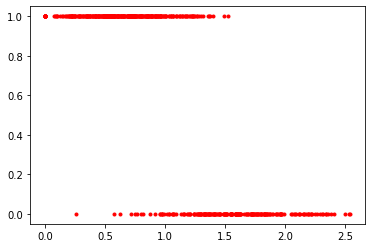

In [0]:
x=np.array(data['worst concave points'])
y=np.array(data['Target'])

x=x/x.mean()
plt.plot(x,y,'r.')

In [0]:
n=int(0.8*len(x))

x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
def error(a,b,x,y):
  error=0
  m=len(x)
  for i in range(m):
    z=a*x[i] + b
    error += y[i]*np.log(sigmoid(z))+(1-y[i])*np.log(1-sigmoid(z))
  return (-1/m)*error

In [0]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a=0
  grad_b=0
  m=len(x)
  for i in range(m):
    z=a*x[i]+b
    grad_a +=1/m * (sigmoid(z)-y[i])*x[i]
    grad_b +=1/m * (sigmoid(z)-y[i])
  a=a-(grad_a * learning_rate)
  b=b-(grad_b * learning_rate)
  return a,b 

In [0]:
def descend(initial_a,initial_b,x,y,learning_rate,iterations):
  a=initial_a
  b=initial_b
  for i in range(iterations):
    e=error(a,b,x,y)
    if i %1000 ==0:
      print(f'Error:{e}')
    a,b=step_gradient(a,b,x,y,learning_rate)
  return a,b    

In [0]:
def accuracy(theta,a,b,x,y):
  count=0
  for j in range(len(x)):
    test = sigmoid(theta)

    if test[j]>0.9:
      z=1
    else:
      z=0
    if y[j]==z:
      count +=1
  acc=count/len(y)
  print(f"Error is (100-(acc*100))")

In [0]:
a=1
b=1
learning_rate=0.01
iterations=10000
final_a,final_b = descend(a,b,x_train,y_train,learning_rate,iterations)

Error:1.1971440889391973
Error:0.5081213131946581
Error:0.4232537588099629
Error:0.3738084611593312
Error:0.34201084500259954
Error:0.3200503774711792
Error:0.3040740520124758
Error:0.29198895197200553
Error:0.28256797406245904
Error:0.27504669212564886


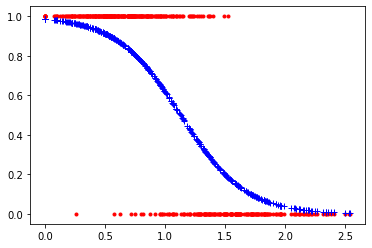

In [0]:
f=final_a *x_train + final_b
plt.plot(x_train,y_train,'r.',x_train,sigmoid(f),'b+')

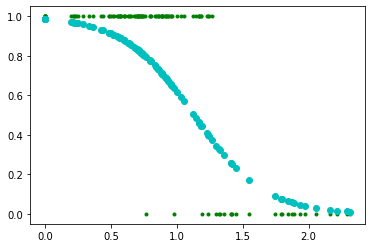

In [0]:
g=final_a *x_test + final_b
plt.plot(x_test,y_test,'g.',x_test,sigmoid(g),'co')